In [1]:
import os
import glob

data_dir = os.path.join('Data/Bengali','NumtaDB')

paths_train_a = glob.glob(os.path.join(data_dir, 'training-a', '*.png'))
paths_train_b = glob.glob(os.path.join(data_dir, 'training-b', '*.png'))
paths_train_e = glob.glob(os.path.join(data_dir, 'training-e', '*.png'))
paths_train_c = glob.glob(os.path.join(data_dir, 'training-c', '*.png'))
paths_train_d = glob.glob(os.path.join(data_dir, 'training-d', '*.png'))
paths_train_all = paths_train_a + paths_train_b + paths_train_c + paths_train_d + paths_train_e

paths_test_a = glob.glob(os.path.join(data_dir, 'testing-a', '*.png'))
paths_test_b = glob.glob(os.path.join(data_dir, 'testing-b', '*.png'))
paths_test_e = glob.glob(os.path.join(data_dir, 'testing-e', '*.png'))
paths_test_c = glob.glob(os.path.join(data_dir, 'testing-c', '*.png'))
paths_test_d = glob.glob(os.path.join(data_dir, 'testing-d', '*.png'))
paths_test_f = glob.glob(os.path.join(data_dir, 'testing-f', '*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.JPG'))
paths_test_auga = glob.glob(os.path.join(data_dir, 'testing-auga', '*.png'))
paths_test_augc = glob.glob(os.path.join(data_dir, 'testing-augc', '*.png'))
paths_test_all = paths_test_a + paths_test_b + paths_test_c + paths_test_d + paths_test_e + paths_test_f + paths_test_auga + paths_test_augc

path_label_train_a = os.path.join(data_dir, 'training-a.csv')
path_label_train_b = os.path.join(data_dir, 'training-b.csv')
path_label_train_e = os.path.join(data_dir, 'training-e.csv')
path_label_train_c = os.path.join(data_dir, 'training-c.csv')
path_label_train_d = os.path.join(data_dir, 'training-d.csv')

In [2]:
import cv2
import numpy as np
import pandas as pd
from keras.utils import to_categorical


def get_key(path):

    key = path.split(sep=os.sep)[-1]
    
    return key


def get_data(paths_img,path_label=None,resize_dim=None):

    X = []
    
    for i, path in enumerate(paths_img):

        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        if resize_dim is not None:
            
            img = cv2.resize(img, (resize_dim, resize_dim), interpolation = cv2.INTER_AREA)
        
        gaussian_3 = cv2.GaussianBlur(img, (9, 9), 10.0) 
        img = cv2.addWeighted(img, 1.5, gaussian_3, -0.5, 0, img)
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        img = cv2.filter2D(img, -1, kernel)
        
        X.append(img) 
        
        if i == len(paths_img) - 1:
            
            end = '\n'
        
        else: 
            
            end = '\r'
        
        print('processed {}/{}'.format(i+1, len(paths_img)), end = end)
        
    X = np.array(X) 
    
    if  path_label is None:
        
        return X
    
    else:
    
        df = pd.read_csv(path_label) 
        df = df.set_index('filename') 

        y_label = [df.loc[get_key(path)]['digit'] for path in  paths_img] 
        y = to_categorical(y_label, 10)

        return X, y


In [3]:
RESIZE_DIM = 28

X_train_a, y_train_a = get_data(paths_train_a, path_label_train_a, resize_dim =RESIZE_DIM)
X_train_b, y_train_b = get_data(paths_train_b, path_label_train_b, resize_dim =RESIZE_DIM)
X_train_c, y_train_c = get_data(paths_train_c, path_label_train_c, resize_dim =RESIZE_DIM)
X_train_d, y_train_d = get_data(paths_train_d, path_label_train_d, resize_dim =RESIZE_DIM)
X_train_e, y_train_e = get_data(paths_train_e, path_label_train_e, resize_dim =RESIZE_DIM)

processed 19702/19702
processed 359/359
processed 24298/24298
processed 10908/10908
processed 16778/16778


In [4]:
X_train_all = np.concatenate((X_train_a, X_train_b, X_train_c, X_train_d, X_train_e), axis=0)
y_train_all = np.concatenate((y_train_a, y_train_b, y_train_c, y_train_d, y_train_e), axis=0)

X_train_all.shape, y_train_all.shape

((72045, 28, 28), (72045, 10))

In [5]:
X_show_all = X_train_all

X_show_all.shape

(72045, 28, 28)

In [6]:
X_test_a = get_data(paths_test_a, resize_dim = RESIZE_DIM)
X_test_b = get_data(paths_test_b, resize_dim = RESIZE_DIM)
X_test_c = get_data(paths_test_c, resize_dim = RESIZE_DIM)
X_test_d = get_data(paths_test_d, resize_dim = RESIZE_DIM)
X_test_e = get_data(paths_test_e, resize_dim = RESIZE_DIM)
X_test_f = get_data(paths_test_f, resize_dim = RESIZE_DIM)
X_test_auga = get_data(paths_test_auga, resize_dim = RESIZE_DIM)
X_test_augc = get_data(paths_test_augc, resize_dim = RESIZE_DIM)

processed 3489/3489
processed 69/69
processed 4381/4381
processed 1948/1948
processed 2970/2970
processed 495/495
processed 2168/2168
processed 2106/2106


In [7]:
X_test_all = np.concatenate((X_test_a, X_test_b, X_test_c, X_test_d, X_test_e, X_test_f, X_test_auga, X_test_augc))

In [8]:
X_tshow_all = X_test_all

X_tshow_all.shape

(17626, 28, 28)

In [9]:
X_train_all = X_train_all.reshape(X_train_all.shape[0], 28, 28, 1).astype('float32')
X_test_all = X_test_all.reshape(X_test_all.shape[0], 28, 28, 1).astype('float32')

In [10]:
X_train_all /= 255
X_test_all /= 255

In [11]:
indices = list(range(len(X_train_all)))

np.random.seed(42)
np.random.shuffle(indices)

ind = int(len(indices) * 0.80)

# train data
X_train = X_train_all[indices[:ind]] 
y_train = y_train_all[indices[:ind]]

# validation data
X_val = X_train_all[indices[-(len(indices)-ind):]] 
y_val = y_train_all[indices[-(len(indices)-ind):]]

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout,BatchNormalization

# my CNN architechture is In -> [[Conv2D->relu]*2 -> BatchNorm -> MaxPool2D -> Dropout]*3 -> Flatten -> Dense -> Activation -> Dropout -> Dense -> Activation -> Out

def my_model(img_size = 28,channels = 1):

    model = Sequential()
    input_shape = (img_size, img_size, channels)
    
    model.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu', padding = 'same'))
    model.add(Conv2D(32, (5, 5), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(256, (3, 3), activation ='relu' , padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    
    return model


model = my_model()

In [13]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint


path_model = 'Models\numdtaBD.h5'

K.clear_session() 

model = my_model() 

K.set_value(model.optimizer.lr, 1e-3)

# fit the model
history = model.fit(x = X_train, y = y_train, batch_size = 64, epochs=30, verbose=1, validation_data=(X_val,y_val), shuffle=True, callbacks=[ModelCheckpoint(filepath = path_model)])

Epoch 1/30
901/901 [==============================] - 503s 558ms/step - loss: 0.4945 - accuracy: 0.8351 - val_loss: 0.2055 - val_accuracy: 0.9352
Epoch 2/30
901/901 [==============================] - 503s 558ms/step - loss: 0.1347 - accuracy: 0.9604 - val_loss: 0.2919 - val_accuracy: 0.9014
Epoch 3/30
901/901 [==============================] - 483s 537ms/step - loss: 0.1011 - accuracy: 0.9704 - val_loss: 0.1182 - val_accuracy: 0.9650
Epoch 4/30
901/901 [==============================] - 450s 499ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.1307 - val_accuracy: 0.9634
Epoch 5/30
901/901 [==============================] - 443s 491ms/step - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.1305 - val_accuracy: 0.9622
Epoch 6/30
901/901 [==============================] - 447s 496ms/step - loss: 0.0623 - accuracy: 0.9826 - val_loss: 0.0991 - val_accuracy: 0.9720
Epoch 7/30
901/901 [==============================] - 472s 523ms/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0845 -

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose = 0)

print('Test loss: %.4f%%' % scores[0])
print('Test accuracy: %.4f%%' % scores[1])

print("Large CNN Error: %.4f%%" % (100-scores[1]*100))


Test loss: 0.0949%
Test accuracy: 0.9854%
Large CNN Error: 1.4644%


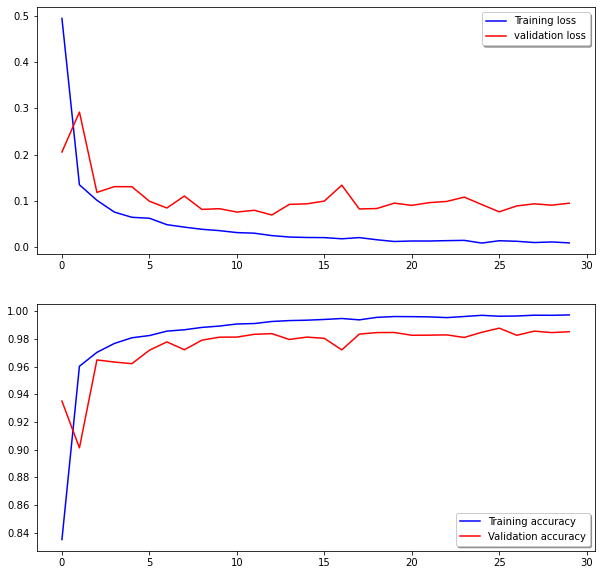

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1,figsize=(10, 10))

ax[0].plot(history.history['loss'], color = 'b', label = "Training loss")
ax[0].plot(history.history['val_loss'], color = 'r', label = "validation loss", axes = ax[0])
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['accuracy'], color = 'b', label = "Training accuracy")
ax[1].plot(history.history['val_accuracy'], color = 'r', label = "Validation accuracy")
legend = ax[1].legend(loc = 'best', shadow = True)